In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [4]:
X,y=make_regression(n_samples=100, n_features=1, noise=20)

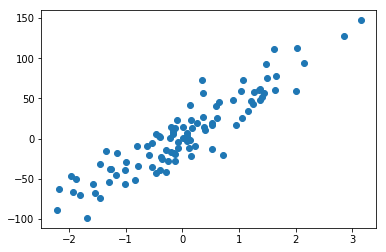

In [5]:
plt.scatter(X,y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Simple Linear Regression

In [7]:
regr=linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

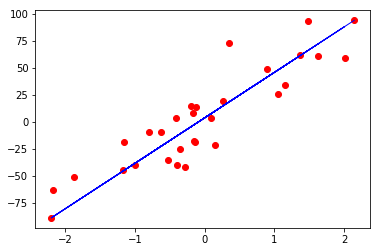

In [11]:
#plt.scatter(X_train, y_train, color='black')
plt.scatter(X_test, y_test, color='red')
#plt.scatter(X_test, regr.predict(X_test), color='blue')
plt.plot(X_test, regr.predict(X_test),color='blue',linewidth=1)
plt.show()

In [12]:
w_0=regr.intercept_
w_1=regr.coef_

In [13]:
print("Intercept: ",w_0)
print("Cofficient: ",w_1)

Intercept:  3.7683332371757574
Cofficient:  [41.89822028]


In [14]:
regr.score(X_train,y_train)

0.8626853401300639

In [15]:
regr.score(X_test,y_test)

0.7959004286939793

## Gradient Decent

In [18]:
#Parameters
alpha=0.001 #learning rate
repeats=1000

#Initializing variables
w0=0
w1=0
errors=[]
points=[]

In [19]:
for j in range(repeats):
    error_sum=0
    squared_error_sum=0
    error_sum_x=0
    for i in range(len(X_train)):
        predict=w0+(X_train[i]*w1)
        squared_error_sum=squared_error_sum+(y_train[i]-predict)**2
        error_sum=error_sum+y_train[i]-predict
        error_sum_x=error_sum_x+(y_train[i]-predict)*X_train[i]
    w0=w0+(alpha*error_sum)
    w1=w1+(alpha*error_sum_x)
    errors.append(squared_error_sum/len(X_train))

print('w0: %2f' %w0)
print('w1: %2f' %w1)

w0: 3.768333
w1: 41.898220


In [20]:
predicts=[]
mean_error=0
for i in range(len(X_test)):
    predict=w0+(X_test[i]*w1)
    predicts.append(predict)

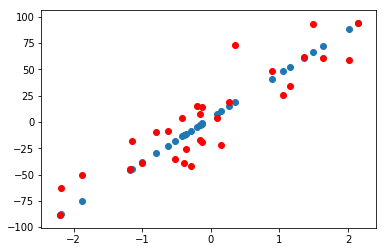

In [21]:
plt.scatter(X_test,predicts)
plt.scatter(X_test, y_test, color='red')
plt.show()

## Polynomial Regression

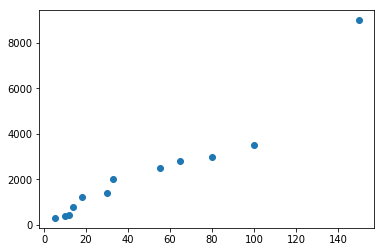

In [23]:
size=[5,10,12,14,18,30,33,55,65,80,100,150]
price=[300,400,450,800,1200,1400,2000,2500,2800,3000,3500,9000]
plt.scatter(size,price)
plt.show()

In [24]:
series_dict={'X':size,'y':price}
df=pd.DataFrame(series_dict)
X=df[['X']]
y=df[['y']]

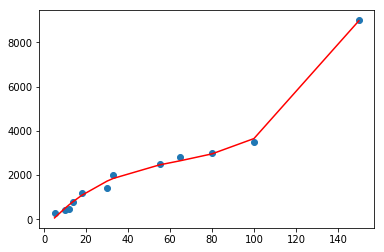

In [25]:
model=make_pipeline(PolynomialFeatures(3),linear_model.LinearRegression())
model.fit(X,y)

plt.scatter(X,y)
plt.plot(X,model.predict(X),color='red')

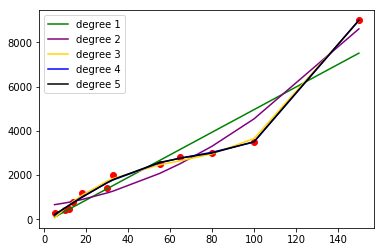

In [26]:
scores=[]
colors=['green','purple','gold','blue','black']
plt.scatter(X,y,c='red')
for count,degree in enumerate([1,2,3,4,5]):
    model=make_pipeline(PolynomialFeatures(degree),linear_model.LinearRegression())
    model.fit(X,y)
    scores.append(model.score(X,y))
    plt.plot(X,model.predict(X),color=colors[count],label='degree %d' %degree)

plt.legend(loc=2)
plt.show()

In [27]:
scores

[0.9059983910519219,
 0.9585314218103534,
 0.9951555665160685,
 0.9966093112780661,
 0.9966678106695324]

## Multivariable Regression

In [32]:
X,y=make_regression(n_samples=100, n_features=5, noise=20)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [36]:
regr=linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
regr.intercept_

0.38433185201801123

In [38]:
regr.coef_

array([ 1.50231856,  4.0364024 , 85.99582128, 43.21365769, 79.9936412 ])

In [39]:
regr.score(X_train,y_train)

0.9803289156174649

In [40]:
regr.score(X_test,y_test)

0.9638841617790044

In [41]:
size=[5,10,12,14,18,30,33,55,65,80,100,150]
distance=[50,20,70,100,200,150,30,50,70,35,40,20]
price=[300,400,450,800,1200,1400,2000,2500,2800,3000,3500,9000]

In [42]:
series_dict={'X1':size,'X2':distance,'y':price}
df=pd.DataFrame(series_dict)
X=df[['X1','X2']]
y=df[['y']]

In [43]:
regr=linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
regr.score(X,y)

0.9071864679091036

In [45]:
regr.intercept_

array([-309.68167455])

In [46]:
regr.coef_

array([[51.94345057,  1.62218727]])

## To Avoid Overfitting
### 1. Lasso Regression
### 2. Ridge Regression

In [47]:
X,y=make_regression(n_samples=1000, n_features=10, noise=10)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [49]:
regr=linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
print('Training Score: ',regr.score(X_train,y_train))
print('Testing Score: ',regr.score(X_test,y_test))

Training Score:  0.9976221685502
Testing Score:  0.9979403047229631


In [51]:
clf_lasso=linear_model.Lasso(alpha=0.5)
clf_lasso.fit(X_train,y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [52]:
print('Training Score: ',clf_lasso.score(X_train,y_train))
print('Testing Score: ',clf_lasso.score(X_test,y_test))

Training Score:  0.9975632483012015
Testing Score:  0.9978302164502658


In [55]:
clf_ridge=linear_model.Ridge(alpha=10)
clf_ridge.fit(X_train,y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [56]:
print('Training Score: ',clf_ridge.score(X_train,y_train))
print('Testing Score: ',clf_ridge.score(X_test,y_test))

Training Score:  0.9974344056334132
Testing Score:  0.9976258911297518


In [57]:
model=make_pipeline(PolynomialFeatures(4),linear_model.Ridge())
model.fit(X,y)
model.score(X,y)

0.9998651881187838